   # 2D versus 3D LES simulations of ASTEX stratocumulus cont.
   ### by Youtong Zheng, Univ. of Maryland, Aug 22, 2020

This is a continued work from the last blog. Here, I wanna expand the analysis to two other situations where the SST underlying clouds is held constant (called 'constSST') and decreases over time (called 'warmadv'). In addition, codes are optimized to a clearer version (I am a beginner to python).

In [36]:
# setting up everything
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
from matplotlib import cm

%matplotlib inline

path="D:/Data/SAM/ASTEX"

tmp = glob.glob(path + "/4km_z_2D/ASTEX_warm2.6/*ASTEX*N100*.nc")
f2D_wadv  = xr.open_dataset(tmp[0])

tmp = glob.glob(path + '/4km_z_2D/ASTEX_cold2.6/*ASTEX*N100*.nc')
f2D_cadv  = xr.open_dataset(tmp[0])

tmp = glob.glob(path + '/4km_z_2D/ASTEX_zero/*ASTEX*N100*.nc')
f2D_0adv  = xr.open_dataset(tmp[0])

tmp = glob.glob(path + "/4km_z_3D/ASTEX_warm2.6_3D/*ASTEX*N100*.nc")
f3D_wadv  = xr.open_dataset(tmp[0])

tmp = glob.glob(path + '/4km_z_3D/ASTEX_cold2.6_3D/*ASTEX*N100*3D.nc')
f3D_cadv  = xr.open_dataset(tmp[0])

tmp = glob.glob(path + '/4km_z_3D/ASTEX_zero_3D/*ASTEX*N100*.nc')
f3D_0adv  = xr.open_dataset(tmp[0])

In [32]:
# defining a function for axe plotting
def make_axis(ioax, iax, ititle, ictitle, ifsize):
    cbar = fig.colorbar(ioax, ax = iax)
    cbar.set_label(ictitle, fontsize=ifsize)

    iax.set_ylim([0., 2000])
    iax.set_xlabel('Days', fontsize=ifsize)  # Add an x-label to the axes.
    iax.set_ylabel('Height (m)', fontsize=ifsize)  # Add a y-label to the axes.
    iax.grid(True)
    iax.set_title(ititle, fontsize=ifsize)

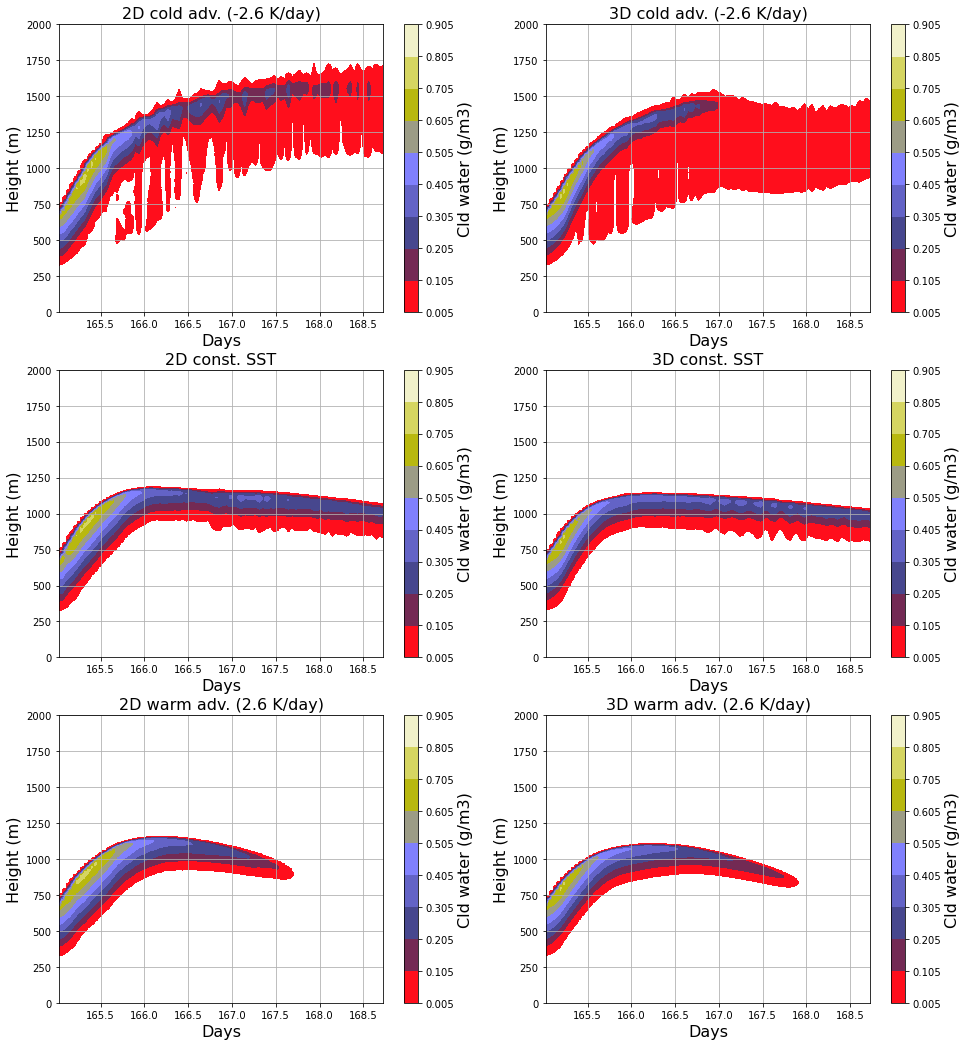

In [38]:
x = f2D_wadv['time']
y = f2D_wadv['z']

fig, ((ax, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3,2,figsize=(16, 18))  # Create a figure and an axes.
myfontsize = 16

#fig1 
var = f2D_cadv['QC']
var = var.T

oax = ax.contourf(x,y,var, cmap = cm.gist_stern, levels = np.arange(0.005,1.,0.1))
make_axis(oax, ax, '2D cold adv. (-2.6 K/day)', 'Cld water (g/m3)', myfontsize)

#fig2 
var = f3D_cadv['QC']
var = var.T

oax = ax2.contourf(x,y,var, cmap = cm.gist_stern, levels = np.arange(0.005,1.,0.1))
make_axis(oax, ax2, '3D cold adv. (-2.6 K/day)', 'Cld water (g/m3)', myfontsize)

#fig3 
var = f2D_0adv['QC']
var = var.T

oax = ax3.contourf(x,y,var, cmap = cm.gist_stern, levels = np.arange(0.005,1.,0.1))
make_axis(oax, ax3, '2D const. SST', 'Cld water (g/m3)', myfontsize)

#fig4 
var = f3D_0adv['QC']
var = var.T

oax = ax4.contourf(x,y,var, cmap = cm.gist_stern, levels = np.arange(0.005,1.,0.1))
make_axis(oax, ax4, '3D const. SST', 'Cld water (g/m3)', myfontsize)

#fig5 
var = f2D_wadv['QC']
var = var.T

oax = ax5.contourf(x,y,var, cmap = cm.gist_stern, levels = np.arange(0.005,1.,0.1))
make_axis(oax, ax5, '2D warm adv. (2.6 K/day)', 'Cld water (g/m3)', myfontsize)

#fig6 
var = f3D_wadv['QC']
var = var.T

oax = ax6.contourf(x,y,var, cmap = cm.gist_stern, levels = np.arange(0.005,1.,0.1))
make_axis(oax, ax6, '3D warm adv. (2.6 K/day)', 'Cld water (g/m3)', myfontsize)

### Notes
- 2D simulations do an excellent job in reproducing the majority of behaviours simulated by 3D
- The bahaviors include:
    - "Deepening warming" decoupling in cold advection conditions.
    - Persistent clouds in constant SST conditions.
    - More rapid dissipation of clouds in warm air adveciton than constant SST conditions.
- However, the warm advection cases may be problematic for both 2D and 3D simulations. We run the same case using Unv. of Washington (UW) version of SAM and found that the clouds are much more persistant (as persistant as clouds in constant SST conditions). We suspect that it is due to the different way the radiative cooling is computed in UW SAM model. This difference has to be understood. We will work more on it.   